In [5]:
#30 times tests in domain
import sys
import os
sys.path.append('..')
from src.includes import *

model_name = 'dlstm'
data_set_name = 'VLC'
home_path = '/home/swj/VD/'
ways = 'myway
classifier = 'RF'
code_type = 'C++'
#change this floder
path = home_path + 'Representation/' + model_name + '_' + ways + '/' + code_type + '/'
save_path = home_path + 'src/' + model_name + '_' + ways + '/' + code_type + '/'
model_path = home_path + 'trained_model' + '/' + model_name + '_' + data_set_name + '_'  + ways + '_' + 'RF' + '.joblib'
#if not os.path.exists(model_path): os.makedirs(model_path)
files= os.listdir(path)
for file in files:
    if not os.path.isdir(file):
        data_set_name = file
        if data_set_name != 'VLC': continue
        res = list()
        path2 = path + data_set_name + '/'
        files2 = os.listdir(path2)
        non_repre, repre = None, None
        for file2 in files2:
            if not os.path.isdir(file2):
                if file2 == 'NonVul.pkl':
                    non_repre = LoadPickleData(path + data_set_name + '/' + file2)
                if file2 == 'Vul.pkl':
                    repre = LoadPickleData(path + data_set_name + '/' + file2)
        #print(non_repre is None, repre is None)
        if repre is None and non_repre is None:
            print('No repres yet!')
            continue
        else:
            print(f'testing {data_set_name}')
        #writer = SummaryWriter(comment=model_name + data_set_name + classifier)
        f1max = 0
        for i in range(30):
            n, m = len(repre), len(non_repre)
            n_features = 128
            train_set_x = []
            for x in repre:
                train_set_x.append(x)
            for x in non_repre:
                train_set_x.append(x)
            X = np.asarray(train_set_x)
            y = np.asarray([1] * n + [0] * m)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
            n_vul = sum((y == 1) for y in y_test)
            clf = None
            if classifier == 'SVM':
                clf = SVC()
            elif classifier == 'MLP':
                clf = MLPClassifier(hidden_layer_sizes=200, random_state=None, max_iter=300)
            elif classifier == 'RF':
                clf = RandomForestClassifier(bootstrap=True, class_weight='balanced', #class_weight={0:1, 1:4},
                            criterion='entropy', max_depth=40, max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=3,
                            min_samples_split=4, min_weight_fraction_leaf=0.0,
                            n_estimators=8000, oob_score=False, random_state=None,
                            verbose=0, warm_start=False, n_jobs=-1)
            
            clf = clf.fit(X_train, y_train)
            y_predict = clf.predict(X_test)
            #writer.add_pr_curve('pr_curve', y_test, y_predict, i)
            target_names = ["Non-defective","Defective"] #non-buggy->0, buggy->1
            ans = classification_report(y_test, y_predict, target_names=target_names, output_dict=True)
            print('#' + str(i) + ':', ans['Defective']['precision'], ans['Defective']['recall'], ans['Defective']['f1-score'], ans['accuracy'])
            if f1max < ans['Defective']['f1-score']:
                f1max = ans['Defective']['f1-score']
                joblib.dump(clf, model_path)
            res.append(['#' + str(i) + ':', ans['Defective']['precision'], ans['Defective']['recall'], ans['Defective']['f1-score'], ans['accuracy']])
        res = np.array(res)
        res = res[:, 1:6]
        df = pd.DataFrame(res, columns=['precision', 'recall', 'f1-score', 'accuracy'])
        
        if not os.path.exists(save_path): os.makedirs(save_path)
        #change this also according above
        df.to_csv(save_path + data_set_name + '_' +  ways + '.csv')


testing VLC
#0: 0.6 0.8181818181818182 0.6923076923076923 0.9956709956709957
#1: 0.7777777777777778 0.8235294117647058 0.7999999999999999 0.9962121212121212
#2: 0.5454545454545454 0.8571428571428571 0.6666666666666665 0.9967532467532467
#3: 0.7333333333333333 0.6875 0.7096774193548386 0.9951298701298701
#4: 0.6666666666666666 0.8571428571428571 0.75 0.9956709956709957
#5: 0.6 1.0 0.7499999999999999 0.9967532467532467
#6: 0.9230769230769231 0.7058823529411765 0.8000000000000002 0.9967532467532467
#7: 0.6666666666666666 1.0 0.8 0.9972943722943723
#8: 0.7 1.0 0.8235294117647058 0.9967532467532467
#9: 0.5454545454545454 0.75 0.631578947368421 0.9962121212121212
#10: 0.6 0.6666666666666666 0.631578947368421 0.9962121212121212
#11: 0.5263157894736842 0.6666666666666666 0.5882352941176471 0.9924242424242424
#12: 0.4117647058823529 1.0 0.5833333333333334 0.9945887445887446
#13: 0.47058823529411764 1.0 0.6399999999999999 0.9951298701298701
#14: 0.75 0.8571428571428571 0.7999999999999999 0.99675

[[ 0.          0.88888889  0.72727273  0.8         0.9978355 ]
 [ 1.          1.          0.85714286  0.92307692  0.99891775]
 [ 2.          1.          0.83333333  0.90909091  0.99891775]
 [ 3.          1.          0.76923077  0.86956522  0.99837662]
 [ 4.          1.          0.8         0.88888889  0.99891775]
 [ 5.          1.          0.66666667  0.8         0.99729437]
 [ 6.          0.90909091  0.90909091  0.90909091  0.99891775]
 [ 7.          1.          0.92857143  0.96296296  0.99945887]
 [ 8.          0.94117647  0.88888889  0.91428571  0.99837662]
 [ 9.          1.          0.85714286  0.92307692  0.99891775]
 [10.          1.          0.83333333  0.90909091  0.99891775]
 [11.          1.          0.86666667  0.92857143  0.99891775]
 [12.          1.          0.78571429  0.88        0.99837662]
 [13.          1.          0.90909091  0.95238095  0.99945887]
 [14.          1.          0.91666667  0.95652174  0.99945887]
 [15.          0.86666667  0.68421053  0.76470588  0.99

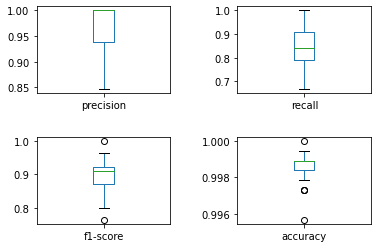

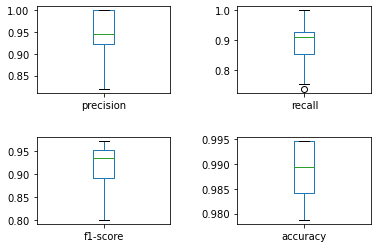

In [12]:
#plot the boxx
import sys
import os
sys.path.append('..')
from src.includes import *


model_name = 'blstm'
data_set_name = 'VLC'
home_path = '/home/swj/VD/'
ways = 'myway'
classifier = 'RF'
code_type = 'C++'
path = save_path = home_path + 'src/' + model_name + '_' + ways + '/' + code_type + '/'
files= os.listdir(path)

res_data = []
for file in files:
    if not os.path.isdir(file):
        filename, ext = file.split('.')
        if ext == 'csv' and filename != 'res':
            
            res = pd.read_csv(path + file)
            fig,axes = plt.subplots(2, 2)
            plt.subplots_adjust(wspace=0.5,hspace=0.5)
            res['precision'].plot(kind='box',ax=axes[0][0])
            res['recall'].plot(kind='box',ax=axes[0][1])
            res['f1-score'].plot(kind='box',ax=axes[1][0])
            res['accuracy'].plot(kind='box',ax=axes[1][1])
            fig.savefig(path + filename + '.png')
            
            res = np.array(res)
            print(res)
            precision = np.median(res[:, 1])
            recall = np.median(res[:, 2])
            f1_score = np.median(res[:, 3])
            accuracy = np.median(res[:, 4])
            print('their are', precision, recall, f1_score, accuracy)
            p_iqr = np.quantile(res[:, 1] ,0.75,interpolation='higher') - np.quantile(res[:, 1] ,0.25,interpolation='lower')
            r_iqr = np.quantile(res[:, 2] ,0.75,interpolation='higher') - np.quantile(res[:, 2] ,0.25,interpolation='lower')
            f_iqr = np.quantile(res[:, 3] ,0.75,interpolation='higher') - np.quantile(res[:, 3] ,0.25,interpolation='lower')
            a_iqr = np.quantile(res[:, 4] ,0.75,interpolation='higher') - np.quantile(res[:, 4] ,0.25,interpolation='lower')
            res_data.append([filename, precision, p_iqr, recall, r_iqr, f1_score, f_iqr, accuracy, a_iqr])

res_data = np.array(res_data)

df = pd.DataFrame(res_data, columns=['data_set', 'precision', 'p_iqr', 'recall', 'r_iqr', 'f1-score', 'f_iqr', 'accuracy', 'a_iqr'])
df.to_csv(path + 'res.csv')


In [ ]:
#cross domain setting
import sys
import os
sys.path.append('..')
from src.includes import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

home_path = '/home/swj/VD/'
model_name = 'bplstm'
ways = 'ast'
classifier = 'RF'

source_domian_data_set_name = 'LibPNG'
target_domain_data_set_name = 'LibTIFF'

source_domain_data_set_vul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + source_domian_data_set_name + '/' + 'Vul.pkl')).to(device)
source_domain_data_set_nonvul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + source_domian_data_set_name + '/' + 'NonVul.pkl')).to(device)
target_domain_data_set_vul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + target_domain_data_set_name + '/' + 'Vul.pkl')).to(device)
target_domain_data_set_nonvul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + target_domain_data_set_name + '/' + 'NonVul.pkl')).to(device)


dim1 = [source_domain_data_set_vul.shape[0], source_domain_data_set_nonvul.shape[0], target_domain_data_set_vul.shape[0], target_domain_data_set_nonvul.shape[0]]
dim2 = [source_domain_data_set_vul.shape[1], source_domain_data_set_nonvul.shape[1], target_domain_data_set_vul.shape[1], target_domain_data_set_nonvul.shape[1]]
source_domain_vul_pos, source_domain_nonvul_pos, target_domain_vul_pos, target_domain_nonvul_pos = \
sum(dim1[:1]), sum(dim1[:2]), sum(dim1[:3]), sum(dim1[:4])

print(source_domain_vul_pos, source_domain_nonvul_pos, target_domain_vul_pos, target_domain_nonvul_pos)
X = torch.cat((source_domain_data_set_vul, source_domain_data_set_nonvul, target_domain_data_set_vul, target_domain_data_set_nonvul), dim = 0)
print(X.shape)
#print(X)
domain_set = [1] * sum(dim1[:2]) + [0] * sum(dim1[2:4])
A = Newton(X, domain_set, 4)
print(A)

In [ ]:
#cross domain setting
import sys
import os
sys.path.append('..')
from src.includes import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

home_path = '/home/swj/VD/'
model_name = 'bplstm'
ways = 'ast'
classifier = 'RF'

source_domian_data_set_name = 'FFmpeg'
target_domain_data_set_name = 'LibTIFF'

source_domain_data_set_vul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + source_domian_data_set_name + '/' + 'Vul.pkl')).to(device)
source_domain_data_set_nonvul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + source_domian_data_set_name + '/' + 'NonVul.pkl')).to(device)
target_domain_data_set_vul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + target_domain_data_set_name + '/' + 'Vul.pkl')).to(device)
target_domain_data_set_nonvul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + target_domain_data_set_name + '/' + 'NonVul.pkl')).to(device)


dim1 = [source_domain_data_set_vul.shape[0], source_domain_data_set_nonvul.shape[0], target_domain_data_set_vul.shape[0], target_domain_data_set_nonvul.shape[0]]
dim2 = [source_domain_data_set_vul.shape[1], source_domain_data_set_nonvul.shape[1], target_domain_data_set_vul.shape[1], target_domain_data_set_nonvul.shape[1]]
source_domain_vul_pos, source_domain_nonvul_pos, target_domain_vul_pos, target_domain_nonvul_pos = \
sum(dim1[:1]), sum(dim1[:2]), sum(dim1[:3]), sum(dim1[:4])

print(source_domain_vul_pos, source_domain_nonvul_pos, target_domain_vul_pos, target_domain_nonvul_pos)
X = torch.cat((source_domain_data_set_vul, source_domain_data_set_nonvul, target_domain_data_set_vul, target_domain_data_set_nonvul), dim = 0)
#print(X)
domain_set = [1] * sum(dim1[:2]) + [0] * sum(dim1[2:4])
A2 = Newton(X, domain_set, 4)
print(A2)

In [ ]:
#cross domain setting
import sys
import os
sys.path.append('..')
from src.includes import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

home_path = '/home/swj/VD/'
model_name = 'bplstm'
ways = 'ast'
classifier = 'RF'

source_domian_data_set_name = 'Asterisk'
target_domain_data_set_name = 'VLC'

source_domain_data_set_vul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + source_domian_data_set_name + '/' + 'Vul.pkl')).to(device)
source_domain_data_set_nonvul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + source_domian_data_set_name + '/' + 'NonVul.pkl')).to(device)
target_domain_data_set_vul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + target_domain_data_set_name + '/' + 'Vul.pkl')).to(device)
target_domain_data_set_nonvul = torch.from_numpy(LoadPickleData(home_path + 'Representation/' + model_name + '_' + ways + '/' + target_domain_data_set_name + '/' + 'NonVul.pkl')).to(device)


dim1 = [source_domain_data_set_vul.shape[0], source_domain_data_set_nonvul.shape[0], target_domain_data_set_vul.shape[0], target_domain_data_set_nonvul.shape[0]]
dim2 = [source_domain_data_set_vul.shape[1], source_domain_data_set_nonvul.shape[1], target_domain_data_set_vul.shape[1], target_domain_data_set_nonvul.shape[1]]
source_domain_vul_pos, source_domain_nonvul_pos, target_domain_vul_pos, target_domain_nonvul_pos = \
sum(dim1[:1]), sum(dim1[:2]), sum(dim1[:3]), sum(dim1[:4])

print(source_domain_vul_pos, source_domain_nonvul_pos, target_domain_vul_pos, target_domain_nonvul_pos)
X = torch.cat((source_domain_data_set_vul, source_domain_data_set_nonvul, target_domain_data_set_vul, target_domain_data_set_nonvul), dim = 0)
#print(X)
domain_set = [1] * sum(dim1[:2]) + [0] * sum(dim1[2:4])
A3 = Newton(X, domain_set, 4)
print(A3)